## Topic Analysis

### Loading and Preprocessing of Corpus

In [1]:
# Import modules
import pandas as pd

In [2]:
# Import csv file into dataframe
flightglobal = pd.read_csv("./data/flightglobal_final.csv")
flightglobal.shape

(2389, 6)

In [3]:
# Remove irrelevant columns
flightglobal = flightglobal['Article'].fillna("")
flightglobal.head()

0    TAP Air Portugal has disclosed plans to furthe...
1    For most of the aviation sector, the coronavir...
2    UK budget carrier EasyJet is proposing to clos...
3    EasyJet's relationship agreement with founder ...
4    Gulfstream delivered the 200th G280 in late Ju...
Name: Article, dtype: object

In [4]:
# Create list of stop words
import nltk
stop_list = nltk.corpus.stopwords.words('english')
stop_list += ['air', 'aircraft', 'airlines', 'airline', 'flight', 'flights', 'aviation', 'aerospace', 
              'million', 'billion', 'says', 'said', 'also', 'show', 'would', 'new', 'first', 'year', 'max',  
              'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
              'including', 'us', 'china', 'boeing', 'airbus',
              'could', 'time', 'states', 'company', 'cirium', 'adds', 'last', 'group']

In [5]:
# Lemmatization with POS Tag
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

In [6]:
# Pre-processing of Corpus
import re
from nltk.corpus import wordnet

def corpus2article(corpus):
    article1 = []
    for row in corpus:
        article = nltk.word_tokenize(row) # tokenisation
        article1.append(article)
    article2 = [[w.lower() for w in article] for article in article1] # change to lower case 
    article3 = [[w.replace('covid-19', 'coronavirus') for w in article] for article in article2] # standardise COVID term
    article4 = [[w.replace('-', '') for w in article] for article in article3] # replace hyphens
    article5 = [[w for w in article if re.search('^[a-z]+$', w)] for article in article4] # remove punctuations
    article6 = [[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in article] for article in article5] # lemmatization
    article7 = [[w for w in article if w not in stop_list] for article in article6] # remove stopwords
    return article7

In [7]:
corpus = corpus2article(flightglobal)

In [8]:
# Create vectors
import gensim
def articles2vecs(articles, dictionary):
    vecs = [dictionary.doc2bow(article) for article in articles]
    return vecs

In [9]:
article_dict = gensim.corpora.Dictionary(corpus)
article_vecs = articles2vecs(corpus, article_dict)

### Latent Dirichlet Allocation with Gensim

In [10]:
# Performing LDA with pre-defined no. of topics
seed = 20
no_topics = 12 # Optimal k based on Coherence Score
flightglobal_gensim = gensim.models.ldamodel.LdaModel(corpus=article_vecs, id2word=article_dict, num_topics=no_topics, random_state=seed)

In [11]:
# Inspect learnt topics using top no. of words
topics = flightglobal_gensim.show_topics(no_topics, 10)

for i in range(0, no_topics):
    print(topics[i])

(0, '0.020*"say" + 0.007*"government" + 0.006*"include" + 0.005*"financial" + 0.005*"carrier" + 0.005*"business" + 0.005*"state" + 0.005*"take" + 0.004*"plan" + 0.004*"work"')
(1, '0.019*"say" + 0.011*"faa" + 0.007*"bek" + 0.007*"airport" + 0.005*"safety" + 0.004*"pilot" + 0.004*"crew" + 0.004*"system" + 0.004*"include" + 0.004*"carrier"')
(2, '0.014*"say" + 0.010*"service" + 0.010*"carrier" + 0.009*"fleet" + 0.008*"passenger" + 0.007*"airport" + 0.007*"data" + 0.006*"operate" + 0.006*"international" + 0.005*"route"')
(3, '0.019*"say" + 0.007*"business" + 0.006*"plan" + 0.006*"include" + 0.005*"add" + 0.005*"government" + 0.004*"u" + 0.004*"carrier" + 0.004*"training" + 0.004*"state"')
(4, '0.027*"say" + 0.006*"helicopter" + 0.006*"service" + 0.005*"order" + 0.005*"add" + 0.005*"engine" + 0.004*"production" + 0.004*"market" + 0.004*"system" + 0.004*"carrier"')
(5, '0.015*"say" + 0.009*"engine" + 0.006*"production" + 0.005*"united" + 0.005*"u" + 0.005*"system" + 0.005*"service" + 0.004*

### Latent Dirichlet Allocation Mallet Model

In [12]:
import gensim
import os
os.environ.update({'MALLET_HOME':r'C:/mallet/mallet-2.0.8/'})

In [13]:
# Performing Mallet with pre-defined no. of topics
seed = 20
no_topics = 7 # Optimal k based on Coherence Score
no_iter = 1000

mallet_path = r'C:\mallet\mallet-2.0.8\bin\mallet' # update this path
flightglobal_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=article_vecs, iterations=no_iter, num_topics=no_topics, id2word=article_dict, random_seed=seed)

In [14]:
# Preview topics
vecTop = flightglobal_mallet.show_topics()
for i in range(0, no_topics):
    print(vecTop[i])

(0, '0.017*"pilot" + 0.015*"crew" + 0.010*"safety" + 0.010*"runway" + 0.010*"engine" + 0.009*"faa" + 0.007*"approach" + 0.007*"control" + 0.007*"land" + 0.007*"state"')
(1, '0.016*"system" + 0.015*"test" + 0.014*"force" + 0.013*"helicopter" + 0.010*"programme" + 0.009*"service" + 0.008*"design" + 0.007*"capability" + 0.007*"technology" + 0.006*"include"')
(2, '0.022*"government" + 0.014*"support" + 0.011*"state" + 0.011*"plan" + 0.009*"uk" + 0.009*"provide" + 0.009*"business" + 0.008*"share" + 0.008*"carrier" + 0.008*"financial"')
(3, '0.017*"expect" + 0.015*"order" + 0.014*"fleet" + 0.014*"cost" + 0.013*"end" + 0.012*"revenue" + 0.011*"quarter" + 0.011*"production" + 0.011*"delivery" + 0.010*"month"')
(4, '0.033*"carrier" + 0.028*"service" + 0.018*"operation" + 0.016*"airport" + 0.016*"international" + 0.016*"route" + 0.016*"schedule" + 0.014*"operate" + 0.013*"fleet" + 0.012*"april"')
(5, '0.014*"business" + 0.010*"customer" + 0.010*"chief" + 0.010*"jet" + 0.010*"market" + 0.010*"wor

### Latent Dirichlet Allocation with sklearn

In [15]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
corpus_joined = [" ".join(x) for x in corpus] # joined to fit vectorizer

# Converts text documents to a matrix of token counts
vectorizer = CountVectorizer()
article_vect = vectorizer.fit_transform(corpus_joined)

# Saves all the words to see the words in each topic
feature_names = vectorizer.get_feature_names()

In [17]:
# Build LDA model with pre-defined no. of topics
seed = 20
no_topics = 4 # Optimal k based on Coherence Score
flightglobal_sklearn = LatentDirichletAllocation(n_components=no_topics, learning_method='online', n_jobs = -1, random_state=seed)
sklearn_output = flightglobal_sklearn.fit_transform(article_vect)

In [18]:
# Inspect top topics and and the top most frequent words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(flightglobal_sklearn, feature_names, 10)

Topic 0:
urban mobility vehicle evtol hypersonic electric drone uber uam taxi
Topic 1:
say crew runway pilot investigation engine airport approach safety inquiry
Topic 2:
say carrier coronavirus passenger government march service add travel fleet
Topic 3:
say system service test helicopter include production programme force engine


### Model Evaluation - Perplexity and Coherence Score

In [19]:
# Prepare test data for perplexity scoring
import pandas as pd
flightglobal_test = pd.read_csv("./data/flightglobal_july.csv")
flightglobal_test.shape

(108, 6)

In [20]:
flightglobal_test = flightglobal_test['Article'].fillna("")
flightglobal_test.head()

0    Serbia has taken delivery of six China Aerospa...
1    UMS Skeldar has secured its third deal within ...
2    Irkut has commenced testing of a domestically-...
3    Aviation consultancy IBA has outlined adjustme...
4    South African Airways unions have largely indi...
Name: Article, dtype: object

In [21]:
corpus_test = corpus2article(flightglobal_test)
article_dict_test = gensim.corpora.Dictionary(corpus_test)
article_vecs_test = articles2vecs(corpus_test, article_dict_test)

In [22]:
corpustest_joined = [" ".join(x) for x in corpus_test] # joined to fit vectorizer
article_vect_test = vectorizer.transform(corpustest_joined)

In [23]:
# Compute perplexity score
perplex_gensim = flightglobal_gensim.log_perplexity(article_vecs_test, total_docs=None) # LDA with Gensim
print('\nPerplexity for LDA Model with Gensim: ', perplex_gensim)


Perplexity for LDA Model with Gensim:  -17.206977798082125


In [24]:
perplex_sklearn = flightglobal_sklearn.perplexity(article_vect_test) # LDA with sklearn
print('\nPerplexity for LDA Model with sklearn: ', perplex_sklearn)


Perplexity for LDA Model with sklearn:  60078.22829925564


In [25]:
# Compute coherence score
from gensim.models import CoherenceModel

# LDA Model with Gensim
coherence_model_gensim = CoherenceModel(model=flightglobal_gensim, texts=corpus, dictionary=article_dict, coherence='c_v')
coherence_gensim = coherence_model_gensim.get_coherence()
print('\nCoherence Score for LDA Model with Gensim: ', coherence_gensim)

# LDA Mallet Model
coherence_model_ldamallet = CoherenceModel(model=flightglobal_mallet, texts=corpus, dictionary=article_dict, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score for LDA Mallet Model: ', coherence_ldamallet)


Coherence Score for LDA Model with Gensim:  0.33175523921392325

Coherence Score for LDA Mallet Model:  0.5107084225872364


### Iterating Perplexity and Coherence Scores across Various k Values

### Perplexity Score

In [27]:
# Compute perplexity score of LDA Model with Gensim for different k
model_list_gensim_p = []
perplexity_values_gensim = []
model_topics_gensim_p = []

seed = 20

for num_topics in range(4, 21, 1):
    flightglobal_gensim_y = gensim.models.ldamodel.LdaModel(corpus=article_vecs_test, id2word=article_dict, num_topics=num_topics, random_state=seed, alpha="auto")
    perplexitymodel = flightglobal_gensim_y.log_perplexity(article_vecs_test, total_docs=None)
    model_topics_gensim_p.append(num_topics)
    model_list_gensim_p.append(flightglobal_gensim_y)
    perplexity_values_gensim.append(flightglobal_gensim_y.log_perplexity(article_vecs_test))
    print("#Topics: " + str(num_topics) + " Score: " + str(flightglobal_gensim_y.log_perplexity(article_vecs_test)))

#Topics: 4 Score: -8.908735802378429
#Topics: 5 Score: -9.024395096645923
#Topics: 6 Score: -9.149856171793914
#Topics: 7 Score: -9.235643356251602
#Topics: 8 Score: -9.393258154965395
#Topics: 9 Score: -9.510975161210792
#Topics: 10 Score: -9.607771089224812
#Topics: 11 Score: -9.694897206127406
#Topics: 12 Score: -9.826166866525215
#Topics: 13 Score: -9.915519809923028
#Topics: 14 Score: -10.043242563370697
#Topics: 15 Score: -10.049050455296552
#Topics: 16 Score: -10.153139655954721
#Topics: 17 Score: -10.18971792197358
#Topics: 18 Score: -10.339795811918675
#Topics: 19 Score: -10.463354542766742
#Topics: 20 Score: -10.474578133356696


In [28]:
# Plot the perplexity score for LDA Model with Gensim
import matplotlib.pyplot as plt
limit=21; start=4; step=1;
y = range(start, limit, step)
plt.plot(y, perplexity_values_gensim)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [29]:
# Compute perplexity score of LDA Mallet Model for different k
for num_topics in range(4, 21, 1):
    flightglobal_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=article_vecs_test, iterations=no_iter, num_topics=num_topics, id2word=article_dict, random_seed=seed)

In [30]:
# Scores were obtained from Anaconda Prompt
perplexity_values_mallet = [-8.43984, -8.43337, -8.46574, -8.46437, -8.47162, -8.4826, -8.50025, -8.51341, -8.52613, 
                            -8.52091, -8.53493, -8.53873, -8.55143, -8.5564, -8.5782, -8.57417, -8.61087]

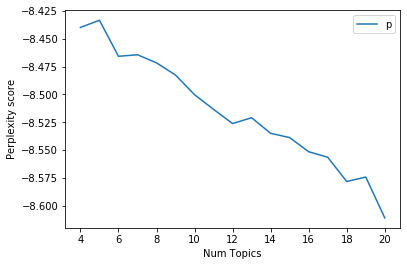

In [31]:
# Plot the perplexity score for LDA Mallet Model
import matplotlib.pyplot as plt
limit=21; start=4; step=1;
y = range(start, limit, step)
plt.plot(y, perplexity_values_mallet)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [33]:
# Compute perplexity score of LDA Model with sklearn for different k
for num_topics in range(4, 21, 1):
    flightglobal_sklearn_y = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = -1, random_state=seed)
    sklearn_output_y = flightglobal_sklearn_y.fit_transform(article_vect)
    perplex_sklearn_y = flightglobal_sklearn_y.perplexity(article_vect_test)
    print('\nPerplexity for LDA Model with sklearn: ', perplex_sklearn_y)


Perplexity for LDA Model with sklearn:  60078.22829925564

Perplexity for LDA Model with sklearn:  97088.32685099864

Perplexity for LDA Model with sklearn:  107196.60213766122

Perplexity for LDA Model with sklearn:  168586.83953815058

Perplexity for LDA Model with sklearn:  182241.03739610355

Perplexity for LDA Model with sklearn:  159251.85045951846

Perplexity for LDA Model with sklearn:  211462.2778412899

Perplexity for LDA Model with sklearn:  197389.1187096743

Perplexity for LDA Model with sklearn:  210441.25168701363

Perplexity for LDA Model with sklearn:  217306.05742697837

Perplexity for LDA Model with sklearn:  209348.20954018747

Perplexity for LDA Model with sklearn:  240627.72350294402

Perplexity for LDA Model with sklearn:  248788.0051075087

Perplexity for LDA Model with sklearn:  248249.6931772811

Perplexity for LDA Model with sklearn:  313721.03894455265

Perplexity for LDA Model with sklearn:  289171.2515919004

Perplexity for LDA Model with sklearn:  295555

In [34]:
# Compute perplexity score of LDA Model with sklearn for different k
for num_topics in range(4, 21, 1):
    flightglobal_sklearn_y = LatentDirichletAllocation(n_components=num_topics, learning_method='online', n_jobs = -1, random_state=seed)
    sklearn_output_y = flightglobal_sklearn_y.fit_transform(article_vect)
    perplex_sklearn_y = flightglobal_sklearn_y.perplexity(article_vect_test)
    print('\nPerplexity for LDA Model with sklearn: ', perplex_sklearn_y)


Perplexity for LDA Model with sklearn:  60079.79211240332

Perplexity for LDA Model with sklearn:  97025.87211761708

Perplexity for LDA Model with sklearn:  107408.05047130329

Perplexity for LDA Model with sklearn:  170275.26819574457

Perplexity for LDA Model with sklearn:  183164.55526642228

Perplexity for LDA Model with sklearn:  158793.53732688844

Perplexity for LDA Model with sklearn:  211358.75520764175

Perplexity for LDA Model with sklearn:  197096.0212716449

Perplexity for LDA Model with sklearn:  210212.38895951372

Perplexity for LDA Model with sklearn:  217204.87588224994

Perplexity for LDA Model with sklearn:  209219.23428934443

Perplexity for LDA Model with sklearn:  240307.34901549952

Perplexity for LDA Model with sklearn:  248455.43394550175

Perplexity for LDA Model with sklearn:  249146.57477304686

Perplexity for LDA Model with sklearn:  313801.489655498

Perplexity for LDA Model with sklearn:  289852.76427921606

Perplexity for LDA Model with sklearn:  2949

In [35]:
# Scores obtained via iterations of different k
perplexity_values_sklearn = [60089.54801, 97095.76973, 107194.4752, 168567.0805, 82254.7746, 159106.8298, 211537.5585, 
                             197137.075, 210325.733, 217480.5644, 210941.998, 240629.9993, 248649.9244, 248270.7704, 
                             313380.8702, 289488.0072, 294843.1227]

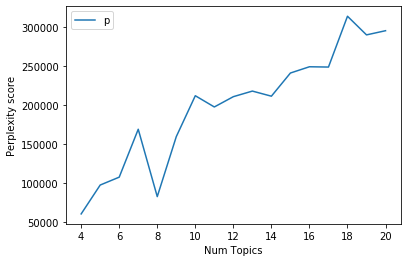

In [36]:
# Plot the perplexity score for sklearn
import matplotlib.pyplot as plt
limit=21; start=4; step=1;
y = range(start, limit, step)
plt.plot(y, perplexity_values_sklearn)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

### Coherence Score

In [37]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [38]:
# Compute coherence score of LDA Model with Gensim for different k
model_list_gensim = []
coherence_values_gensim = []
model_topics_gensim = []

seed=20

for num_topics in range(4, 21, 1):
    flightglobal_gensim_x = gensim.models.ldamodel.LdaModel(corpus=article_vecs, id2word=article_dict, num_topics=num_topics, random_state=seed, alpha="auto")
    coherencemodel = CoherenceModel(model=flightglobal_gensim_x, texts=corpus, dictionary=article_dict, coherence='c_v')
    model_topics_gensim.append(num_topics)
    model_list_gensim.append(flightglobal_gensim_x)
    coherence_values_gensim.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

#Topics: 4 Score: 0.3029716604862394
#Topics: 5 Score: 0.3023195695404072
#Topics: 6 Score: 0.3068858684909257
#Topics: 7 Score: 0.31037378979254476
#Topics: 8 Score: 0.3042712762270139
#Topics: 9 Score: 0.303768622748616
#Topics: 10 Score: 0.32229542323801297
#Topics: 11 Score: 0.3221974024494371
#Topics: 12 Score: 0.33175523921392325
#Topics: 13 Score: 0.3266773673040759
#Topics: 14 Score: 0.3282532835795635
#Topics: 15 Score: 0.3163563928699463
#Topics: 16 Score: 0.32065581357782147
#Topics: 17 Score: 0.3320057112521097
#Topics: 18 Score: 0.34997939766780456
#Topics: 19 Score: 0.34346247281622116
#Topics: 20 Score: 0.338011504265345


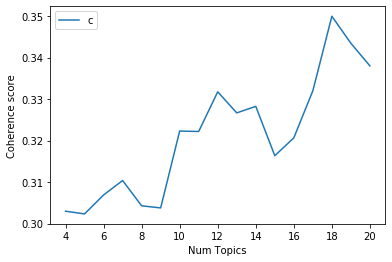

In [39]:
# Plot the coherence score for LDA Model with Gensim
limit=21; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_gensim)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
gensim_optimal = model_list_gensim[13]

gensim_topics = gensim_optimal.print_topics(num_topics=17)
for topic in gensim_topics:
    print(topic)

(0, '0.019*"say" + 0.008*"government" + 0.007*"flybe" + 0.006*"financial" + 0.006*"include" + 0.006*"state" + 0.005*"work" + 0.005*"business" + 0.005*"carrier" + 0.005*"coronavirus"')
(1, '0.016*"say" + 0.012*"faa" + 0.012*"bek" + 0.008*"airport" + 0.006*"safety" + 0.005*"pilot" + 0.004*"crew" + 0.004*"traffic" + 0.004*"system" + 0.004*"fokker"')
(2, '0.012*"service" + 0.012*"say" + 0.012*"carrier" + 0.009*"passenger" + 0.008*"fleet" + 0.008*"data" + 0.008*"route" + 0.007*"operate" + 0.007*"airport" + 0.007*"international"')
(3, '0.017*"say" + 0.010*"business" + 0.007*"rescue" + 0.007*"plan" + 0.007*"government" + 0.007*"saa" + 0.006*"state" + 0.005*"include" + 0.005*"south" + 0.005*"add"')
(4, '0.022*"say" + 0.008*"helicopter" + 0.007*"service" + 0.005*"carrier" + 0.005*"certification" + 0.004*"system" + 0.004*"safety" + 0.004*"include" + 0.004*"add" + 0.004*"u"')
(5, '0.014*"say" + 0.010*"united" + 0.009*"production" + 0.006*"spirit" + 0.005*"work" + 0.005*"site" + 0.005*"u" + 0.004*

In [41]:
# Compute coherence score of LDA Mallet Model for different k
model_list_mallet = []
coherence_values_mallet = []
model_topics_mallet = []

seed=20

for num_topics in range(4, 21, 1):
    flightglobal_mallet_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=1000, corpus=article_vecs, num_topics=num_topics, id2word=article_dict, random_seed=seed, optimize_interval=100, workers=5)
    coherencemodel = CoherenceModel(model=flightglobal_mallet_x, texts=corpus, dictionary=article_dict, coherence='c_v')
    model_topics_mallet.append(num_topics)
    model_list_mallet.append(flightglobal_mallet_x)
    coherence_values_mallet.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

#Topics: 4 Score: 0.5252299880818516
#Topics: 5 Score: 0.5394124043794148
#Topics: 6 Score: 0.5465351821666962
#Topics: 7 Score: 0.5465433888006964
#Topics: 8 Score: 0.5236620306055811
#Topics: 9 Score: 0.5428319347787969
#Topics: 10 Score: 0.5304432140246698
#Topics: 11 Score: 0.4972278961879024
#Topics: 12 Score: 0.5322029608016077
#Topics: 13 Score: 0.514699645152939
#Topics: 14 Score: 0.535082893144568
#Topics: 15 Score: 0.5284069499854607
#Topics: 16 Score: 0.5498474758070722
#Topics: 17 Score: 0.5229612693614841
#Topics: 18 Score: 0.5262112376580643
#Topics: 19 Score: 0.5425829319935138
#Topics: 20 Score: 0.5181142723842237


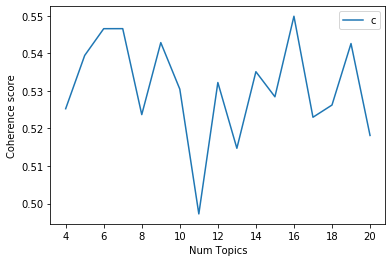

In [42]:
# Plot the coherence score for LDA Mallet Model
limit=21; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_mallet)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
mallet_optimal = model_list_mallet[3]

mallet_topics = mallet_optimal.print_topics(num_topics=7)
for topic in mallet_topics:
    print(topic)

(0, '0.014*"government" + 0.010*"plan" + 0.010*"carrier" + 0.009*"business" + 0.009*"state" + 0.008*"agreement" + 0.007*"support" + 0.007*"uk" + 0.007*"share" + 0.007*"add"')
(1, '0.017*"crew" + 0.013*"runway" + 0.012*"pilot" + 0.010*"faa" + 0.008*"safety" + 0.008*"approach" + 0.007*"land" + 0.007*"engine" + 0.007*"investigation" + 0.007*"inquiry"')
(2, '0.026*"carrier" + 0.022*"service" + 0.016*"international" + 0.015*"airport" + 0.015*"route" + 0.013*"passenger" + 0.012*"operate" + 0.012*"schedule" + 0.011*"march" + 0.010*"operation"')
(3, '0.016*"helicopter" + 0.014*"force" + 0.013*"system" + 0.009*"service" + 0.009*"test" + 0.007*"capability" + 0.007*"military" + 0.007*"usaf" + 0.007*"programme" + 0.007*"lockheed"')
(4, '0.013*"coronavirus" + 0.012*"government" + 0.011*"industry" + 0.011*"passenger" + 0.010*"travel" + 0.008*"measure" + 0.007*"include" + 0.007*"support" + 0.007*"work" + 0.007*"country"')
(5, '0.013*"production" + 0.012*"engine" + 0.010*"jet" + 0.009*"programme" + 0.

### Visualizations 

In [44]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
gensim_visual = pyLDAvis.gensim.prepare(flightglobal_gensim, article_vecs, article_dict)
pyLDAvis.save_html(gensim_visual, "gensimtopic_viz.html") # save the output to the html file

C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [45]:
# Generate the visualisation

# For Gensim Model
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
gensim_visual = pyLDAvis.gensim.prepare(flightglobal_gensim, article_vecs, article_dict)
pyLDAvis.save_html(gensim_visual, "gensimtopic_viz.html") # save the output to the html file

C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [46]:
# For Mallet Model
import gensim
import pyLDAvis.gensim

mallet_Lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(flightglobal_mallet) # convert class of mallet model into LdaModel
pyLDAvis.enable_notebook()
mallet_visual = pyLDAvis.gensim.prepare(mallet_Lda, article_vecs, article_dict)
pyLDAvis.save_html(mallet_visual, "mallettopic_viz.html") # save the output to the html file

C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [47]:
# For sklearn
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis

sklearn_visual = sklearn_lda.prepare(flightglobal_sklearn, article_vect, vectorizer)
pyLDAvis.save_html(sklearn_visual, "sklearntopic_viz.html") # save the output to the html file

C:\Users\selen\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
